In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
df = pd.read_csv("C:/Users/irene/Codsoft/DataScience/Task3/IRIS.csv")

### Data Exploration and data Visualizations 

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


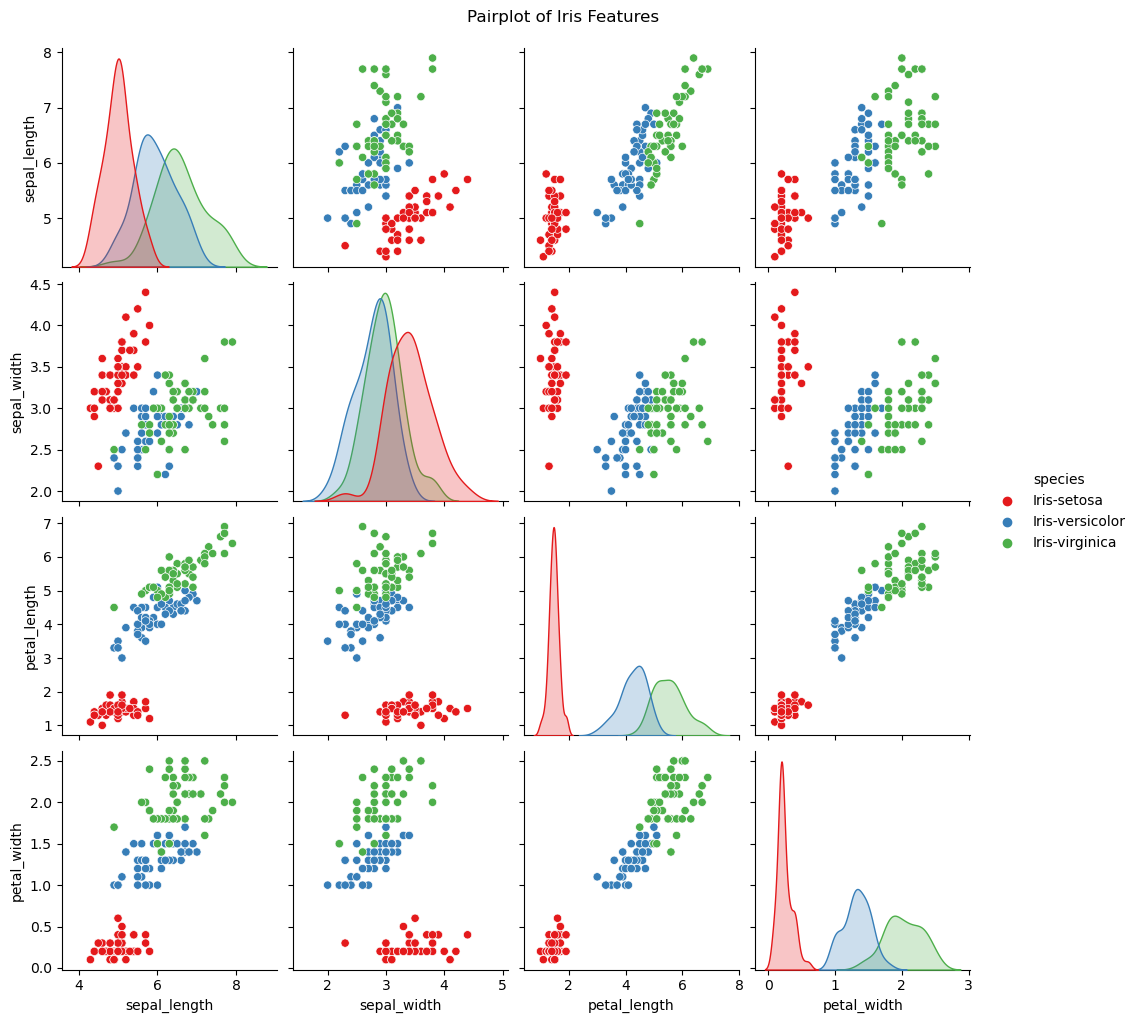

In [28]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

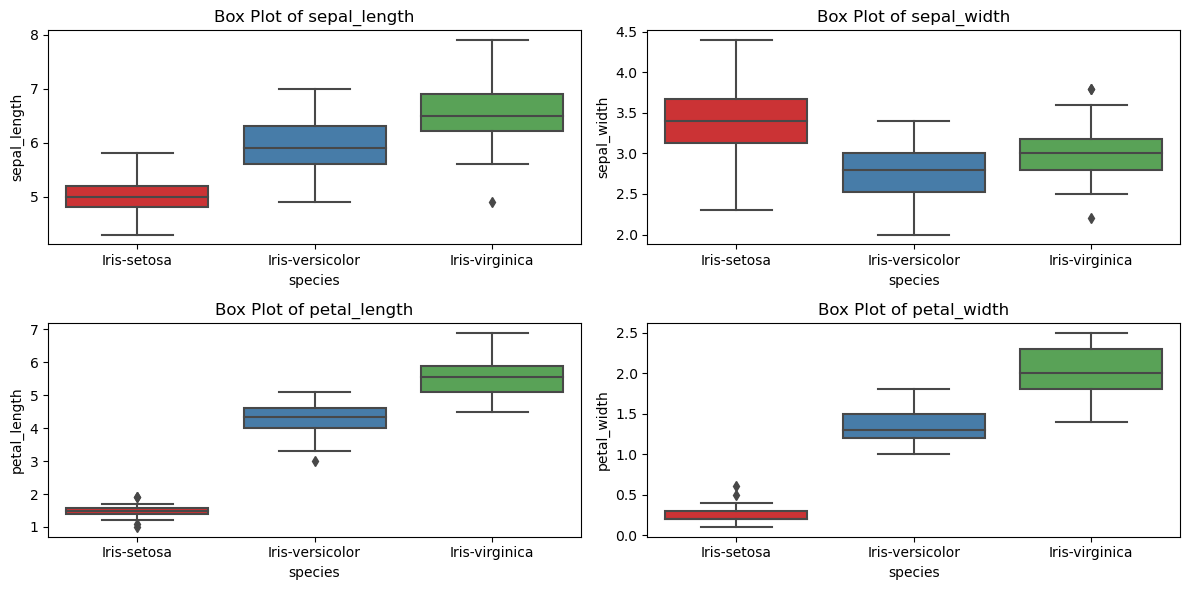

In [29]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the target variable
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df, palette='Set1')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


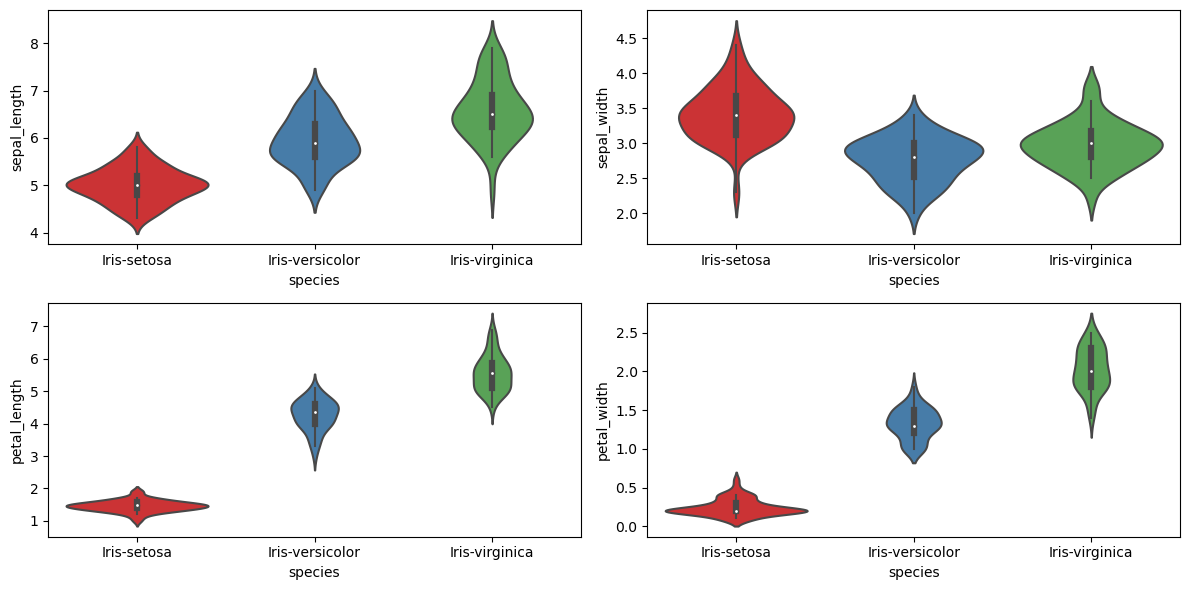

In [30]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the target variable
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=df, palette='Set1')
plt.tight_layout()
plt.show()



C:\Users\irene\AppData\Local\Temp\ipykernel_5992\804790896.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


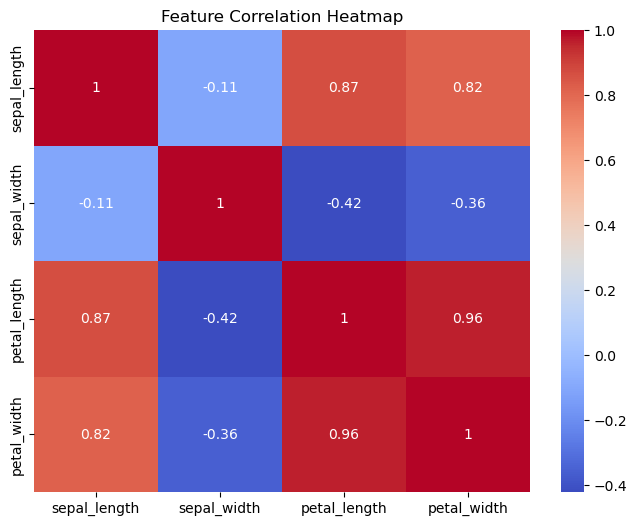

In [31]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [32]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
replace = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [34]:
df['species'] = df['species'].replace(replace)

In [35]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

### SVM Model

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [37]:
X = df.drop(['species'], axis=1)
y = df['species']


In [38]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

1.0

### Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model1 = RandomForestClassifier(n_estimators=9)

In [44]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=9)

In [45]:
y_predd = model1.predict(X_test)

In [46]:
accuracy_score(y_pred,y_test)

1.0